# NOTE: DO THIS TO DOWNLOAD THE DATA AHHHH

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c ucsc-cse-164-spring-2022-final-project

100% 83.0M/83.2M [00:00<00:00, 127MB/s]
100% 83.2M/83.2M [00:00<00:00, 133MB/s]


In [ ]:
! unzip ucsc-cse-164-spring-2022-final-project.zip

Streaming output truncated to the last 5000 lines.
  inflating: MedMNIST/unlabeled/wd7e02foa4lx5bmn3yjg.jpeg  
  inflating: MedMNIST/unlabeled/wd8etjl53gbi7cr0u219.jpeg  
  inflating: MedMNIST/unlabeled/wd8jr70uiefpyoal326t.jpeg  
  inflating: MedMNIST/unlabeled/wd8xsfvrnjel5g197thp.jpeg  
  inflating: MedMNIST/unlabeled/wd912m7eo86pui5nqyxf.jpeg  
  inflating: MedMNIST/unlabeled/wd9r8fb426hzcigl3kyu.jpeg  
  inflating: MedMNIST/unlabeled/wdba49eg1v7j6l8ynckt.jpeg  
  inflating: MedMNIST/unlabeled/wdcmep8szni6q1tkbfal.jpeg  
  inflating: MedMNIST/unlabeled/wdhu1kcay0v4ge9on7fj.jpeg  
  inflating: MedMNIST/unlabeled/wdibvl14hyca2qs6ujzx.jpeg  
  inflating: MedMNIST/unlabeled/wdje573ftlkc0bi4pq1u.jpeg  
  inflating: MedMNIST/unlabeled/wdjgzibhkyx4f8r7cl2t.jpeg  
  inflating: MedMNIST/unlabeled/wdji94xy21vrmg07usez.jpeg  
  inflating: MedMNIST/unlabeled/wdk4yv7esch3p2mfau56.jpeg  
  inflating: MedMNIST/unlabeled/wdm23o745vqgut6bpcax.jpeg  
  inflating: MedMNIST/unlabeled/wdn8qhvir9pt57bxe

# We gucci now, let us code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from functools import partial
import random
import matplotlib.pyplot as plt
import copy
import os
import pickle
from PIL import Image

In [ ]:
# Doing what the professor said
label_dict = {}
for i, line in enumerate(open("/content/MedMNIST/wnids.txt", "r")):
  label_dict[line.rstrip("\n")] = i

In [ ]:
# setting a seed
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
labeled_images = []
unlabeled_images = []
test_images = []

In [ ]:
# Load our labeled data
for _, data in enumerate(label_dict):
  directory = f'/content/MedMNIST/lableed/{data}'
  # print(directory)
  for filename in os.listdir(directory):
    with open(os.path.join(directory, filename), 'r') as f:
      image_path = f.name
      img = Image.open(image_path).convert("RGB")
      img = np.array(img)
      labeled_images.append([img, label_dict.get(data)])

In [ ]:
# load our unlabeled data
for filename in os.listdir('/content/MedMNIST/unlabeled'):
  with open(os.path.join('/content/MedMNIST/unlabeled', filename), 'r') as f:
    image_path = f.name
    img = Image.open(image_path).convert("RGB")
    img = np.array(img)
    unlabeled_images.append(img)

In [ ]:
# load our test data
for filename in os.listdir('/content/MedMNIST/test'):
  with open(os.path.join('/content/MedMNIST/test', filename), 'r') as f:
    image_path = f.name
    img = Image.open(image_path).convert("RGB")
    img = np.array(img)
    test_images.append(img)

In [ ]:
print(len(labeled_images))
print(len(unlabeled_images))
print(len(test_images))
# plt.imshow(test_images[0].shape)
print(test_images[0].shape)
print(unlabeled_images[0].shape)

60
49834
6000
(64, 64, 3)
(64, 64, 3)


In [ ]:
# Time to get our training data
# labeled_images
labeled_x_train = []
labeled_y_train = []
# unlabeled
unlabeled_x_train = []
unlabeled_y_train = []
# test
test_x = []

for i, data in enumerate(labeled_images):
  labeled_x_train.append(data[0])
  labeled_y_train.append(data[1])

for _, data in enumerate(unlabeled_images):
  unlabeled_x_train.append(data)
  unlabeled_y_train.append(-1)

for _, data in enumerate(test_images):
  # print(data[0].shape)
  test_x.append(data)

In [ ]:
labeled_x_train   = np.array(labeled_x_train)
labeled_y_train   = np.array(labeled_y_train)
unlabeled_x_train = np.array(unlabeled_x_train)
unlabeled_y_train = np.array(unlabeled_y_train)
test_x            = np.array(test_x)

labeled_y_train = keras.utils.to_categorical(labeled_y_train, 6)
unlabeled_y_train = keras.utils.to_categorical(unlabeled_y_train, 6)


In [ ]:
# labeled_y_train
# np.argmax(labeled_y_train)
print(test_x.shape)
print(labeled_x_train.shape)

# labeled_x_train.shape

(6000, 64, 64, 3)
(60, 64, 64, 3)


In [ ]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 500
input_shape = labeled_x_train[0].shape
num_classes = 6

labeled_train_dataset = tf.data.Dataset.from_tensor_slices((labeled_x_train, labeled_y_train))
labeled_train_dataset = labeled_train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
unlabeled_train_dataset = tf.data.Dataset.from_tensor_slices((unlabeled_x_train, unlabeled_y_train))
# unlabeled_train_dataset = tf.data.Dataset.from_tensor_slices(unlabeled_x_train)
unlabeled_train_dataset = unlabeled_train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

train_dataset = tf.data.Dataset.zip((unlabeled_train_dataset, labeled_train_dataset))

In [ ]:
train_dataset

<ZipDataset element_spec=((TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)), (TensorSpec(shape=(None, 64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)))>

# Our class needed for semisupervised learning

In [ ]:
class SemisupervisedModel(keras.Model):
    def __init__(self, model, entropy=False, lamda=0.1):
        super().__init__()

        self.model = model
        self.cce = tf.keras.losses.CategoricalCrossentropy()

        self.entropy = entropy
        self.lamda = lamda

    def compile(self, optimizer, **kwargs):
        super().compile(**kwargs)

        self.optimizer = optimizer
        self.accuracy_tracker = keras.metrics.Accuracy()
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker, self.accuracy_tracker]
        # return [self.loss_tracker]

    def call(self, images, training=True):
        return self.model(images, training=training)

    def semisupervised_loss(self, labeled_y_true, labeled_y_pred, unlabeled_y_true, unlabeled_y_pred):
        loss = self.cce(labeled_y_true, labeled_y_pred)
        if self.entropy:
            loss += -self.lamda * tf.reduce_mean(tf.reduce_sum(unlabeled_y_pred * tf.math.log(unlabeled_y_pred + 1e-12), axis=1))
        return loss

    def train_step(self, data):
        (unlabeled_images, unlabeled_y_true), (labeled_images, labeled_y_true) = data

        with tf.GradientTape() as tape:
            labeled_y_pred = self.call(labeled_images, training=True)
            unlabeled_y_pred = self.call(unlabeled_images, training=True)
            loss = self.semisupervised_loss(labeled_y_true, labeled_y_pred, unlabeled_y_true, unlabeled_y_pred)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.loss_tracker.update_state(loss)

        self.accuracy_tracker.update_state(tf.math.argmax(unlabeled_y_true, axis=1), tf.math.argmax(unlabeled_y_pred, axis=1))
        self.accuracy_tracker.update_state(tf.math.argmax(labeled_y_true, axis=1), tf.math.argmax(labeled_y_pred, axis=1))

        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        images, labels = data
        y_pred = self.call(images, training=False)

        loss = self.cce(labels, y_pred)
        self.loss_tracker.update_state(loss)

        self.accuracy_tracker.update_state(tf.math.argmax(labels, axis=1), tf.math.argmax(y_pred, axis=1))

        return {m.name: m.result() for m in self.metrics}

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=input_shape, pooling='max')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
semi_model = SemisupervisedModel(
    keras.Sequential(
    [
        # keras.Input(shape=input_shape),
        # layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        # layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        # layers.MaxPooling2D(pool_size=(2, 2)),
        resnet,
        layers.Flatten(),
        # layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
    ),
    entropy=True
)

In [ ]:
epochs = 500
# compile model
semi_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"])

semi_model.fit(train_dataset, epochs=epochs)

Epoch 1/500
1/1 [==============================] - 10s 10s/step - loss: 0.5351 - accuracy: 0.5242
Epoch 2/500
1/1 [==============================] - 0s 173ms/step - loss: 0.5204 - accuracy: 0.5242
Epoch 3/500
1/1 [==============================] - 0s 157ms/step - loss: 0.5108 - accuracy: 0.5161
Epoch 4/500
1/1 [==============================] - 0s 157ms/step - loss: 0.4881 - accuracy: 0.5645
Epoch 5/500
1/1 [==============================] - 0s 158ms/step - loss: 0.4992 - accuracy: 0.5161
Epoch 6/500
1/1 [==============================] - 0s 158ms/step - loss: 0.4983 - accuracy: 0.5484
Epoch 7/500
1/1 [==============================] - 0s 155ms/step - loss: 0.4870 - accuracy: 0.5161
Epoch 8/500
1/1 [==============================] - 0s 161ms/step - loss: 0.4700 - accuracy: 0.5242
Epoch 9/500
1/1 [==============================] - 0s 162ms/step - loss: 0.4645 - accuracy: 0.5565
Epoch 10/500
1/1 [==============================] - 0s 153ms/step - loss: 0.4615 - accuracy: 0.5323
Epoch 11/5

In [ ]:
# Testing our model
results = semi_model.predict(test_x)

1


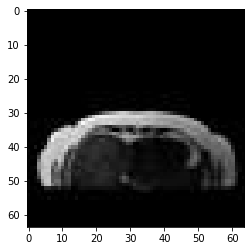

In [ ]:
# results.shape
print(np.argmax(results[0]))
plt.imshow(test_x[0])

In [ ]:
# time to package our data
# import pandas as pd
import csv

In [ ]:
header = ["image_id", "label"]

In [ ]:
with open('/content/submission.csv', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(header)
    i=0
    for filename in os.listdir('/content/MedMNIST/test'):
        with open(os.path.join('/content/MedMNIST/test', filename), 'r') as f:
            image_path = os.path.splitext(os.path.basename(f.name))[0]
            # print(image_path)
            writer.writerow([image_path, np.argmax(results[i])])
            i+=1

In [ ]:
semi_model.save("/content/trained_model")

INFO:tensorflow:Assets written to: /content/trained_model/assets


In [ ]:
! zip -r model.zip /content/trained_model/

  adding: content/trained_model/ (stored 0%)
  adding: content/trained_model/saved_model.pb (deflated 92%)
  adding: content/trained_model/keras_metadata.pb (deflated 96%)
  adding: content/trained_model/assets/ (stored 0%)
  adding: content/trained_model/variables/ (stored 0%)
  adding: content/trained_model/variables/variables.data-00000-of-00001 (deflated 12%)
  adding: content/trained_model/variables/variables.index (deflated 81%)


In [ ]:
# output = pd.concat(pd.Series(test_x[0]), pd.Series(test_x[1]))